In [1]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
# LOADING THE DATASET
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

we have 4177 rows and 9 columns including tha target

In [5]:
#statistical summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


This column shows the statistical values for the data like mean,standard deviation and percentiles,minimum and maximum.

In [6]:
#checking for null values or missing data
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null or missing values in the above dataset.

We can also see this by a visualization method by using seaborn library.

<AxesSubplot:>

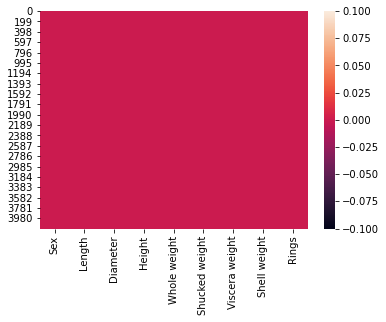

In [7]:
sns.heatmap(df.isnull())

In [8]:
#checking for datatypes
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

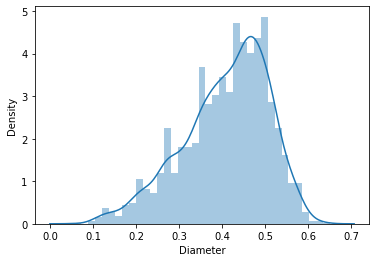

In [9]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

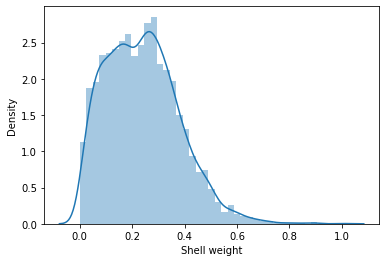

In [10]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

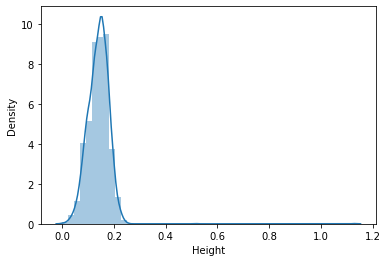

In [11]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

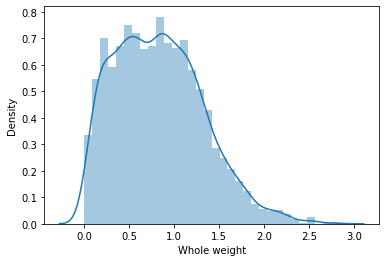

In [12]:
sns.distplot(df['Whole weight'])

In [14]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [15]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

The sex column is an object type so we can do 2 things either we remove the column or we can encode the column. best approach is to encode the column by using label encoding.

In [16]:
# LABEL ENCODING
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


we encoded the sex column in an integer form(0,1,2).

In [18]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

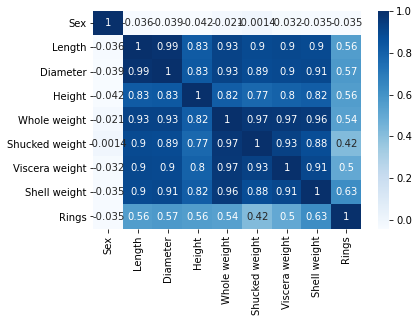

In [19]:
sns.heatmap(df.corr(),cmap='Blues',fmt='.2g',annot=True)

From the above correlation matrix we can conclude that 'length' and 'daimeter' column are highly correlated and 'whole weight' and 'shucked weight' are also highly correlated. so Multicolenearity is present in the dataset. so for this we are going to use variance inflation factor(VIF).

highly correlated-'length' and 'daimeter' and 'whole weight' and 'shucked weight'

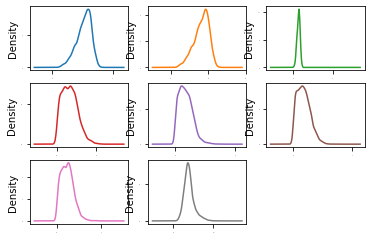

In [13]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,legend=False,fontsize=1)
plt.show()

Data are not normally distributed. so skewness is present in the dataset.

In [20]:
#Splitting the independent variables and target
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [21]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [22]:
x.skew().sort_values(ascending=False)

Height            3.128817
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
Length           -0.639873
dtype: float64

In [23]:
x_new=power_transform(x)
type(x_new)

numpy.ndarray

In [24]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.127072,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,1.127072,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-1.307935,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,1.127072,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-0.009459,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,-1.307935,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,1.127072,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,1.127072,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,-1.307935,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [25]:
x.skew().sort_values(ascending=False)

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.115483
Sex              -0.176442
dtype: float64

In [26]:
sk=x.skew()
sk

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

skewness has been removed

{'whiskers': [<matplotlib.lines.Line2D at 0x11e426850>,
 'caps': [<matplotlib.lines.Line2D at 0x11e426f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e4264f0>],
 'medians': [<matplotlib.lines.Line2D at 0x11e6935e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e693910>],
 'means': []}

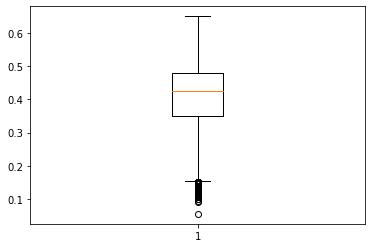

In [28]:
#CHECKING OUTLIERS
plt.boxplot(df['Diameter'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11e75d160>,
 'caps': [<matplotlib.lines.Line2D at 0x11e75d820>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e74cdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x11e75dee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e767280>],
 'means': []}

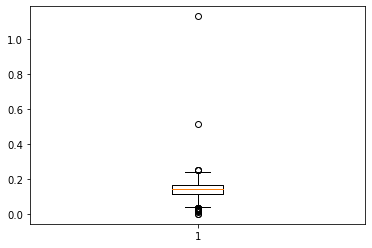

In [29]:
plt.boxplot(df['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11e26ea90>,
 'caps': [<matplotlib.lines.Line2D at 0x11e165160>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e1c6bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x11e79eb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e779d60>],
 'means': []}

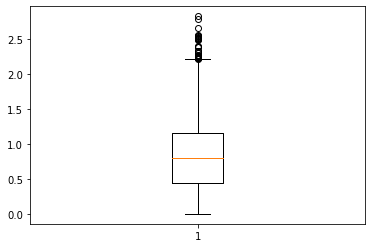

In [30]:
plt.boxplot(df['Whole weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11e5e11f0>,
 'caps': [<matplotlib.lines.Line2D at 0x11e5e12e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e5e1b80>],
 'medians': [<matplotlib.lines.Line2D at 0x11e612220>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e6125b0>],
 'means': []}

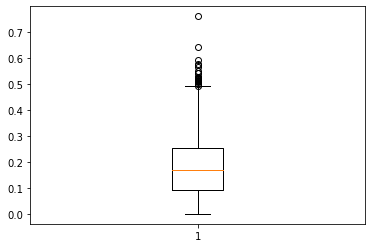

In [31]:
plt.boxplot(df['Viscera weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11e27e340>,
 'caps': [<matplotlib.lines.Line2D at 0x11e27e5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e2909a0>],
 'medians': [<matplotlib.lines.Line2D at 0x11e3f2ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e3f21c0>],
 'means': []}

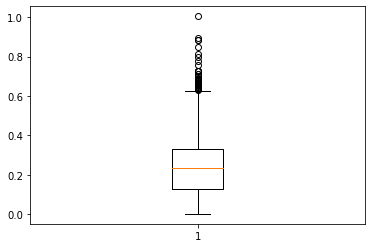

In [32]:
plt.boxplot(df['Shell weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11e06c5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x11e06c220>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e06ce80>],
 'medians': [<matplotlib.lines.Line2D at 0x11e067b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e067940>],
 'means': []}

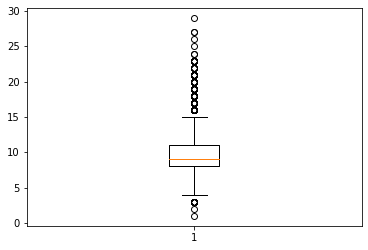

In [33]:
plt.boxplot(df['Rings'])

from the above plots we can see that there are outliers present in each column of the dataset. so we will try to remove the outliers to improve the accuracy score of the model.

In [35]:
#REMOVING OUTLIERS USING ZSCORE
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

looking the code and the output above,it is difficult to say which data pointer is an oulier.lets try and define a threshold to identify an outlier.

In [36]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [37]:
#array 1 is holding the row number and array two is holding the column
z[6][6]

0.35668983027099027

In [38]:
z[72][6]

0.40516364050565146

In [39]:
#IQR SCORE(INTERQUARTILE RANGE)
Q1=df.quantile(0.25)
Q1

Sex               0.0000
Length            0.4500
Diameter          0.3500
Height            0.1150
Whole weight      0.4415
Shucked weight    0.1860
Viscera weight    0.0935
Shell weight      0.1300
Rings             8.0000
Name: 0.25, dtype: float64

In [40]:
Q3=df.quantile(0.75)
Q3

Sex                2.000
Length             0.615
Diameter           0.480
Height             0.165
Whole weight       1.153
Shucked weight     0.502
Viscera weight     0.253
Shell weight       0.329
Rings             11.000
Name: 0.75, dtype: float64

In [41]:
IQR=Q3-Q1
IQR

Sex               2.0000
Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

In [43]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
df.shape

(4177, 9)

In [45]:
df_new.shape

(4027, 9)

In [48]:
x1=df_new.iloc[:,0:-1]
x1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [50]:
y1=df_new.iloc[:,-1]
y1

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [51]:
#VIF(VARIANCE INFLATION FACTOR)
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    vif['features']=x.columns
    print(vif)

In [52]:
vif_calc()

   VIF Factor        features
0    2.586539             Sex
1  711.017756          Length
2  762.862946        Diameter
3   92.050181          Height
4  441.600560    Whole weight
5  108.511496  Shucked weight
6   65.669278  Viscera weight
7   94.849108    Shell weight


So from the above code it is observed that lenght and diameter and whole weight and shucked weight are having multicolinearity.so we can drop the column which is less contributing towards the output. Here length and shucked weight are less contributing so we can drop these two.

In [54]:
df_new.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [55]:
df_new

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [56]:
#training and testing of model
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=.20,random_state=152)

In [57]:
xtrain.shape

(3221, 8)

In [58]:
xtrain.shape

(3221, 8)

In [59]:
xtest.shape

(806, 8)

In [60]:
ytest.shape

(806,)

In [61]:
#APPLYING ML ALGORITHMS
#LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg=lg.predict(xtest)
print(accuracy_score(ytest,predlg))
print(classification_report(ytest,predlg))
print(confusion_matrix(ytest,predlg))

0.2543424317617866
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.25      0.10      0.14        21
           6       0.33      0.30      0.31        57
           7       0.32      0.30      0.31        92
           8       0.21      0.41      0.28       107
           9       0.28      0.39      0.33       137
          10       0.22      0.31      0.26       124
          11       0.24      0.23      0.23        92
          12       0.00      0.00      0.00        57
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00         7
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         6

    accuracy                           0.25       806
   macr

In [62]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
predrfc=lg.predict(xtest)
print(accuracy_score(ytest,predrfc))
print(classification_report(ytest,predrfc))
print(confusion_matrix(ytest,predrfc))

0.2543424317617866
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.25      0.10      0.14        21
           6       0.33      0.30      0.31        57
           7       0.32      0.30      0.31        92
           8       0.21      0.41      0.28       107
           9       0.28      0.39      0.33       137
          10       0.22      0.31      0.26       124
          11       0.24      0.23      0.23        92
          12       0.00      0.00      0.00        57
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00         7
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         6

    accuracy                           0.25       806
   macr

In [63]:
#SUPPORT VECTOR CLASSIFIER
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(classification_report(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))

0.25930521091811415
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.33      0.10      0.15        21
           6       0.35      0.35      0.35        57
           7       0.41      0.32      0.36        92
           8       0.25      0.28      0.27       107
           9       0.21      0.50      0.30       137
          10       0.25      0.35      0.29       124
          11       0.27      0.18      0.22        92
          12       0.00      0.00      0.00        57
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00         7
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         6

    accuracy                           0.26       806
   mac

In [64]:
# CROSS VALIDATION
scr=cross_val_score(lg,x,y,cv=5)
print('cross validation score of logistic regression is',scr.mean())

cross validation score of logistic regression is 0.26909406068246283


In [66]:
scr2=cross_val_score(rfc,x,y,cv=5)
print('cross validation score of Random forest classifier is',scr2.mean())

cross validation score of Random forest classifier is 0.2511457467839441


In [67]:
scr3=cross_val_score(svc,x,y,cv=5)
print('cross validation score of Support vector classifier is',scr3.mean())

cross validation score of Support vector classifier is 0.2659805747356961


Logistic Regression is performing well among all three so we will go with logistic regression.

In [68]:
# HYPERPARAMETER TUNING
RandomForestClassifier()
parameters={'max_features':["auto", "sqrt", "log2"],'max_depth':[4,5,6,7,8],'criterion':["gini", "entropy"]}

In [69]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(xtrain,ytrain)
gcv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}

In [70]:
gcv_pred=gcv.best_estimator_.predict(xtest)
accuracy_score(ytest,gcv_pred)

0.2642679900744417

In [71]:
#SAVING THE BEST MODEL
import joblib
joblib.dump(gcv.best_estimator_,'Abalone.pk1')

['Abalone.pk1']